# Projet de machine learning

## Import des livrairies et dataset

In [66]:
## Import des librairies
import csv

import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib as mp

In [67]:
## Grand prix de Monaco essai libre
monaco_p1 = pd.read_csv('6_Monaco_data/p1.csv',sep=';')
monaco_p2 = pd.read_csv('6_Monaco_data/p2.csv',sep=';')
monaco_p3 = pd.read_csv('6_Monaco_data/p3.csv',sep=';')

## Grand prix de Monaco Qualification
monaco_qualify = pd.read_csv('6_Monaco_data/qualify.csv',sep=';')


## Grand prix du Canada essai libre
canada_p1 = pd.read_csv('7_Canada_data/p1.csv',sep=';')
canada_p2 = pd.read_csv('7_Canada_data/p2.csv',sep=';')
canada_p3 = pd.read_csv('7_Canada_data/p3.csv',sep=';')

## Grand prix du Canada Qualification
canada_qualify = pd.read_csv('7_Canada_data/qualify.csv',sep=';')


## Grand prix d'Europe essai libre
europa_p1 = pd.read_csv('8_Europa_data/p1.csv',sep=';')
europa_p2 = pd.read_csv('8_Europa_data/p2.csv',sep=';')
europa_p3 = pd.read_csv('8_Europa_data/p3.csv',sep=';')

## Grand prix d'Europe Qualification
europa_qualify = pd.read_csv('8_Europa_data/qualify.csv',sep=';')


## Grand prix de Grande bretagne essai libre
great_britain_p1 = pd.read_csv('9_Great_britain_data/p1.csv',sep=';')
great_britain_p2 = pd.read_csv('9_Great_britain_data/p2.csv',sep=';')
great_britain_p3 = pd.read_csv('9_Great_britain_data/p3.csv',sep=';')

## Grand prix de Grande bretagne Qualification
great_britain_qualify = pd.read_csv('9_Great_britain_data/qualify.csv',sep=';')


## Grand prix d'Allemagne essai libre
germany_p1 = pd.read_csv('10_Germany_data/p1.csv',sep=';')
germany_p2 = pd.read_csv('10_Germany_data/p2.csv',sep=';')
germany_p3 = pd.read_csv('10_Germany_data/p3.csv',sep=';')

## Grand prix d'Allemagne Qualification
germany_qualify = pd.read_csv('10_Germany_data/qualify.csv',sep=';')


## Grand prix d'Hongrie essai libre
hungary_p1 = pd.read_csv('11_Hungary_data/p1.csv',sep=';')
hungary_p2 = pd.read_csv('11_Hungary_data/p2.csv',sep=';')
hungary_p3 = pd.read_csv('11_Hungary_data/p3.csv',sep=';')

## Grand prix d'Hongrie Qualification
hungary_qualify = pd.read_csv('11_Hungary_data/qualify.csv',sep=';')


## Grand prix de Belgique essai libre
belgium_p1 = pd.read_csv('12_Belgium_data/p1.csv',sep=';')
belgium_p2 = pd.read_csv('12_Belgium_data/p2.csv',sep=';')
belgium_p3 = pd.read_csv('12_Belgium_data/p3.csv',sep=';')

## Grand prix de Belgique Qualification
belgium_qualify = pd.read_csv('12_Belgium_data/qualify.csv',sep=';')

## Grand prix de Belgique essai libre
italia_p1 = pd.read_csv('13_Italia_data/p1.csv',sep=';')
italia_p2 = pd.read_csv('13_Italia_data/p2.csv',sep=';')
italia_p3 = pd.read_csv('13_Italia_data/p3.csv',sep=';')

## Grand prix de Belgique Qualification
italia_qualify = pd.read_csv('13_Italia_data/qualify.csv',sep=';')


## Fonction

In [68]:
## Retourne le temps le plus rapide effectué pendant les essais libres pour un pilote

## Prend en paramètre 3 tableau avec une colonne Time et Name et un String qui est le nom du pilote
def minimumPractice(p1,p2,p3,name):
    query = 'Name == "' + name + '"'
    minimum = 99999
    
    tmp = p1[['Time','Name']].query(query)
    if (np.isnan(tmp['Time'].min()) != True) :
        minimum = tmp['Time'].min()

    tmp = p2[['Time','Name']].query(query)
    if (np.isnan(tmp['Time'].min()) != True) and (tmp['Time'].min() < minimum) :
        minimum = tmp['Time'].min()

    tmp = p3[['Time','Name']].query(query)
    if (np.isnan(tmp['Time'].min()) != True) and (tmp['Time'].min() < minimum) :
        minimum = tmp['Time'].min()
    
    if minimum == 99999:
        minimum = float("nan")
    return minimum 

In [69]:
## Retourne le temps le plus rapide effectué pendant les essais libres et son meilleur temps au qualification
## pour un pilote 

## Prend en paramètre 4 tableau avec une colonne Time et Name et un String qui est le nom du pilote
def minimumPracticeAndQualify(p1,p2,p3,qualify,name):
    minimum_practice = minimumPractice(p1,p2,p3,name)
    
    query = 'Name == "' + name + '"'
    tmp = qualify[['Time','Name']].query(query)
    minimum_qualify = tmp['Time'].min()
    minimum = [minimum_qualify,minimum_practice,name]
    return minimum

In [70]:
## Retourne les temps les plus rapide effectuées pendant les essais libres et son meilleur temps au qualification 
## pour chaque grand prix pour un pilote 

## Prend en paramètre un nom de pilote
def minimumPracticeAndQualifyForAllRace(name):
    monaco = minimumPracticeAndQualify(monaco_p1,monaco_p2,monaco_p3,monaco_qualify,name) + ['monaco']
    canada = minimumPracticeAndQualify(canada_p1,canada_p2,canada_p3,canada_qualify,name) + ['canada']
    europa = minimumPracticeAndQualify(europa_p1,europa_p2,europa_p3,europa_qualify,name) + ['europa']
    great_britain = minimumPracticeAndQualify(great_britain_p1,great_britain_p2,great_britain_p3,great_britain_qualify,name) + ['great_britain']
    germany = minimumPracticeAndQualify(germany_p1,germany_p2,germany_p3,germany_qualify,name) + ['germany']
    hungary = minimumPracticeAndQualify(hungary_p1,hungary_p2,hungary_p3,hungary_qualify,name) + ['hungary']
    belgium = minimumPracticeAndQualify(belgium_p1,belgium_p2,belgium_p3,belgium_qualify,name) + ['belgium']
    italia = minimumPracticeAndQualify(italia_p1,italia_p2,italia_p3,italia_qualify,name) + ['italia']
    
    total = [monaco,canada,europa,great_britain,germany,hungary,belgium,italia]
    return total

## Traitement des dataset

In [71]:
## Grand prix de Monaco
monaco_p1["Time"] =  monaco_p1["Time"].str.replace(',','.').astype(float)
monaco_p2["Time"] =  monaco_p2["Time"].str.replace(',','.').astype(float)
monaco_p3["Time"] =  monaco_p3["Time"].str.replace(',','.').astype(float)
monaco_qualify["Time"] =  monaco_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix du Canada
canada_p1["Time"] =  canada_p1["Time"].str.replace(',','.').astype(float)
canada_p2["Time"] =  canada_p2["Time"].str.replace(',','.').astype(float)
canada_p3["Time"] =  canada_p3["Time"].str.replace(',','.').astype(float)
canada_qualify["Time"] =  canada_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix d'Europe
europa_p1["Time"] =  europa_p1["Time"].str.replace(',','.').astype(float)
europa_p2["Time"] =  europa_p2["Time"].str.replace(',','.').astype(float)
europa_p3["Time"] =  europa_p3["Time"].str.replace(',','.').astype(float)
europa_qualify["Time"] =  europa_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix de Grande bretagne
great_britain_p1["Time"] =  great_britain_p1["Time"].str.replace(',','.').astype(float)
great_britain_p2["Time"] =  great_britain_p2["Time"].str.replace(',','.').astype(float)
great_britain_p3["Time"] =  great_britain_p3["Time"].str.replace(',','.').astype(float)
great_britain_qualify["Time"] =  great_britain_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix d'Allemagne
germany_p1["Time"] =  germany_p1["Time"].str.replace(',','.').astype(float)
germany_p2["Time"] =  germany_p2["Time"].str.replace(',','.').astype(float)
germany_p3["Time"] =  germany_p3["Time"].str.replace(',','.').astype(float)
germany_qualify["Time"] =  germany_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix d'Hongrie
hungary_p1["Time"] =  hungary_p1["Time"].str.replace(',','.').astype(float)
hungary_p2["Time"] =  hungary_p2["Time"].str.replace(',','.').astype(float)
hungary_p3["Time"] =  hungary_p3["Time"].str.replace(',','.').astype(float)
hungary_qualify["Time"] =  hungary_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix de Belgique
belgium_p1["Time"] =  belgium_p1["Time"].str.replace(',','.').astype(float)
belgium_p2["Time"] =  belgium_p2["Time"].str.replace(',','.').astype(float)
belgium_p3["Time"] =  belgium_p3["Time"].str.replace(',','.').astype(float)
belgium_qualify["Time"] =  belgium_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix d'italie
italia_p1["Time"] =  italia_p1["Time"].str.replace(',','.').astype(float)
italia_p2["Time"] =  italia_p2["Time"].str.replace(',','.').astype(float)
italia_p3["Time"] =  italia_p3["Time"].str.replace(',','.').astype(float)
italia_qualify["Time"] =  italia_qualify["Time"].str.replace(',','.').astype(float)

In [72]:
vettel = minimumPracticeAndQualifyForAllRace('S. VETTEL')
webber = minimumPracticeAndQualifyForAllRace('M. WEBBER')
hamilton = minimumPracticeAndQualifyForAllRace('L. HAMILTON')
button = minimumPracticeAndQualifyForAllRace('J. BUTTON')
alonso = minimumPracticeAndQualifyForAllRace('F. ALONSO')
massa = minimumPracticeAndQualifyForAllRace('F. MASSA')
schumacher = minimumPracticeAndQualifyForAllRace('M. SCHUMACHER')
rosberg = minimumPracticeAndQualifyForAllRace('N. ROSBERG')
heidfeld = minimumPracticeAndQualifyForAllRace('N. HEIDFELD')
senna = minimumPracticeAndQualifyForAllRace('B. SENNA')
petrov = minimumPracticeAndQualifyForAllRace('V. PETROV')
barrichello = minimumPracticeAndQualifyForAllRace('R. BARRICHELLO')
maldonado = minimumPracticeAndQualifyForAllRace('P. MALDONADO')
sutil = minimumPracticeAndQualifyForAllRace('A. SUTIL')
di_resta = minimumPracticeAndQualifyForAllRace('P. DI RESTA')
kobayashi = minimumPracticeAndQualifyForAllRace('K. KOBAYASHI')
perez = minimumPracticeAndQualifyForAllRace('S. PEREZ')
de_la_rosa = minimumPracticeAndQualifyForAllRace('P. DE LA ROSA')
buemi = minimumPracticeAndQualifyForAllRace('S. BUEMI')
alguersuari = minimumPracticeAndQualifyForAllRace('J. ALGUERSUARI')
kovalainen = minimumPracticeAndQualifyForAllRace('H. KOVALAINEN')
trulli = minimumPracticeAndQualifyForAllRace('J. TRULLI')
chandhok = minimumPracticeAndQualifyForAllRace('K. CHANDHOK')
ricciardo = minimumPracticeAndQualifyForAllRace('D. RICCIARDO')
liuzzi = minimumPracticeAndQualifyForAllRace('V. LIUZZI')
karthikeyan = minimumPracticeAndQualifyForAllRace('N. KARTHIKEYAN')
glock = minimumPracticeAndQualifyForAllRace('T. GLOCK')
ambrosio = minimumPracticeAndQualifyForAllRace("J. D'AMBROSIO")

In [73]:
driver = [vettel,webber,hamilton,button,alonso,massa,schumacher,rosberg,heidfeld,senna,petrov,barrichello]
driver = driver + [maldonado,sutil,di_resta,kobayashi,perez,de_la_rosa,buemi,alguersuari,kovalainen,trulli]
driver = driver + [chandhok,ricciardo,liuzzi,karthikeyan,glock,ambrosio]

In [74]:
with open('data_f1_2011_practice_qualify.csv','w') as data_f1_2011_practice_qualify:
    wr = csv.writer(data_f1_2011_practice_qualify)
    wr.writerow(['qualify','practice','driver','track'])
    for i in driver:
        for j in i:
             wr.writerow([j[0],j[1],j[2],j[3]])

## Partie 1 
### Comparaison des meilleurs temps en essai libre et des meilleurs temps en qualification

In [75]:
data_f1_2011_practice_qualify = pd.read_csv('data_f1_2011_practice_qualify.csv')

In [76]:
data_f1_2011_practice_qualify['ecart'] = data_f1_2011_practice_qualify['practice'] - data_f1_2011_practice_qualify['qualify'] 

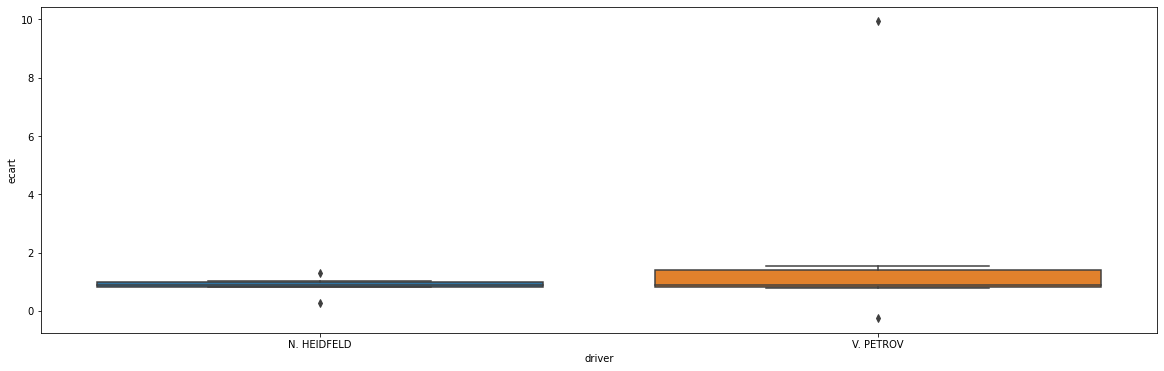

In [80]:
g = sns.boxplot(x="driver", y="ecart", data=data_f1_2011_practice_qualify.query('(driver == "V. PETROV" and track != "italia") or (driver == "N. HEIDFELD" and track != "italia") '))
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

In [84]:
data_f1_2011_practice_qualify.query('(driver == "V. PETROV" and track != "italia") or (driver == "N. HEIDFELD" and track != "italia") ')

,qualify,practice,driver,track,ecart
64,76.214,77.126,N. HEIDFELD,monaco,0.912
65,74.062,75.350,N. HEIDFELD,canada,1.288
66,98.781,99.040,N. HEIDFELD,europa,0.259
67,93.805,94.822,N. HEIDFELD,great_britain,1.017
68,92.215,93.072,N. HEIDFELD,germany,0.857
69,82.470,83.281,N. HEIDFELD,hungary,0.811
70,NaN,NaN,N. HEIDFELD,belgium,NaN
80,75.815,77.337,V. PETROV,monaco,1.522
81,74.085,74.917,V. PETROV,canada,0.832
82,99.068,98.822,V. PETROV,europa,-0.246


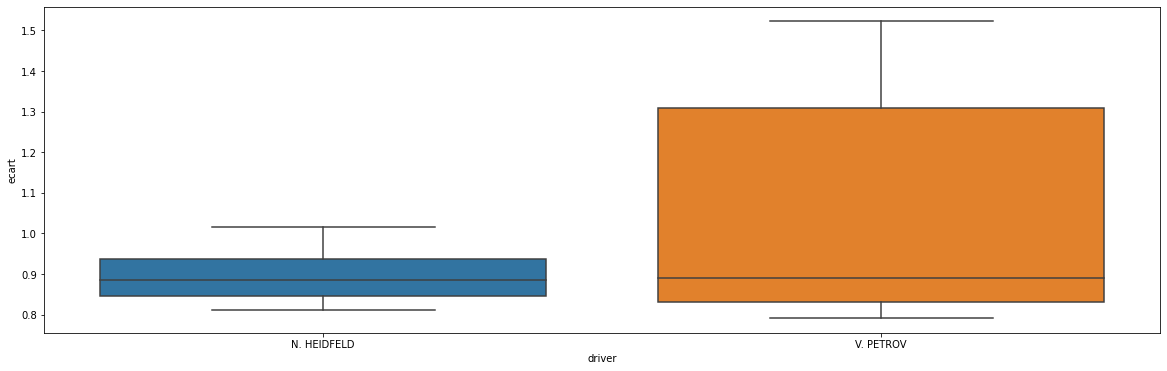

In [82]:
g = sns.boxplot(x="driver", y="ecart", data=data_f1_2011_practice_qualify.query('(driver == "V. PETROV" and track != "belgium" and track != "europa" and track != "italia") or (driver == "N. HEIDFELD" and track != "canada" and track != "europa" and track != "italia")'))
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

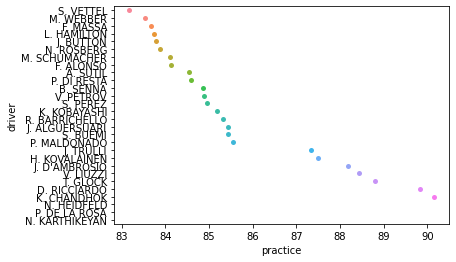

In [94]:
rax = sns.swarmplot(data=data_f1_2011_practice_qualify.query('track == "italia"').sort_values(by=['practice']),x="practice",y="driver")

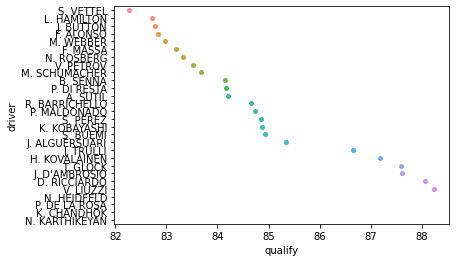

In [93]:
rax = sns.swarmplot(data=data_f1_2011_practice_qualify.query('track == "italia"').sort_values(by=['qualify']),x="qualify",y="driver")

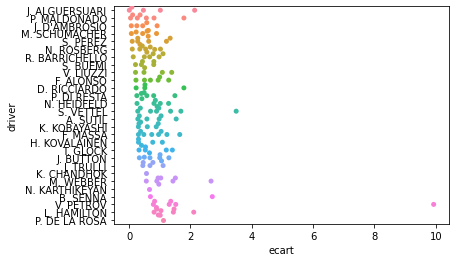

In [97]:
rax = sns.swarmplot(data=data_f1_2011_practice_qualify.query('ecart >= 0').sort_values(by=['ecart']),x="ecart",y="driver")

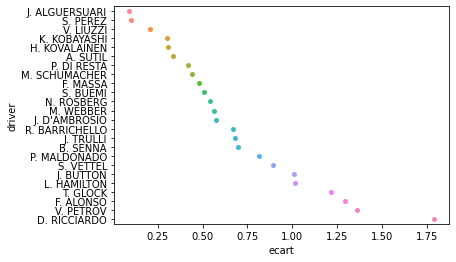

In [98]:
rax = sns.swarmplot(data=data_f1_2011_practice_qualify.query('ecart >= 0 and track == "italia"').sort_values(by=['ecart']),x="ecart",y="driver")

In [99]:
italia_p1

,Name,DriverNum,Lap,Time,Elapsed,Stint,Fuel Corrected Laptime,Stint Length,Lap in stint
0,T. GLOCK,24,2,133.040,"1068,993",1,"133,04",1,1
1,T. GLOCK,24,5,130.488,"4756,279",3,"130,208",6,1
2,T. GLOCK,24,6,97.158,"4853,437",3,"96,934",6,2
3,T. GLOCK,24,7,91.502,"4944,939",3,"91,334",6,3
4,T. GLOCK,24,8,91.052,"5035,991",3,"90,94",6,4
...,...,...,...,...,...,...,...,...,...
412,S. BUEMI,18,20,89.113,"4963,061",4,"88,889",8,4
413,S. BUEMI,18,21,87.601,"5050,662",4,"87,433",8,5
414,S. BUEMI,18,22,94.292,"5144,954",4,"94,18",8,6
415,S. BUEMI,18,23,88.352,"5233,306",4,"88,296",8,7


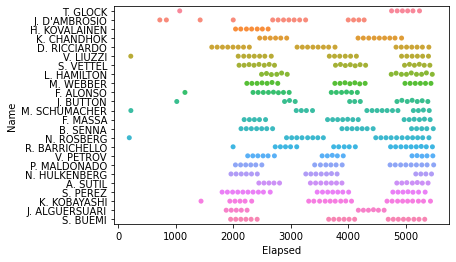

In [104]:
italia_p1["Elapsed"] =  italia_p1["Elapsed"].str.replace(',','.').astype(float)

rax = sns.swarmplot(data=italia_p1,x="Elapsed",y="Name")

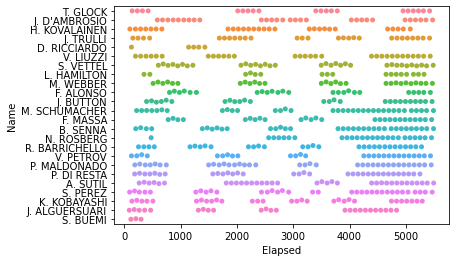

In [105]:
italia_p2["Elapsed"] =  italia_p2["Elapsed"].str.replace(',','.').astype(float)

rax = sns.swarmplot(data=italia_p2,x="Elapsed",y="Name")

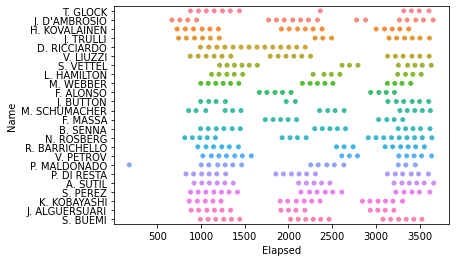

In [106]:
italia_p3["Elapsed"] =  italia_p3["Elapsed"].str.replace(',','.').astype(float)

rax = sns.swarmplot(data=italia_p3,x="Elapsed",y="Name")

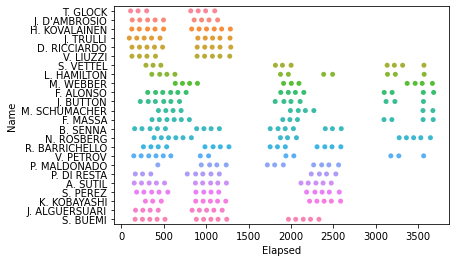

In [109]:
italia_qualify["Elapsed"] =  italia_qualify["Elapsed"].str.replace(',','.').astype(float)

rax = sns.swarmplot(data=italia_qualify,x="Elapsed",y="Name")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Time'>

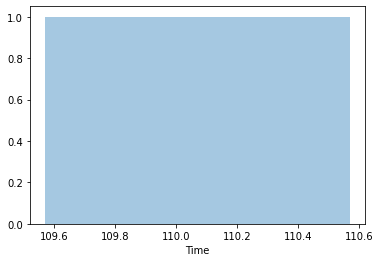

In [130]:
tmp = italia_p2.query('Name == "V. PETROV" and Time > 100')
sns.distplot(tmp['Time'])

In [132]:
italia_p1.query('Name == "V. PETROV" and Time > 100')

,Name,DriverNum,Lap,Time,Elapsed,Stint,Fuel Corrected Laptime,Stint Length,Lap in stint
270,V. PETROV,10,7,110.334,2717.044,1,"110,334",6,6
275,V. PETROV,10,13,102.826,3915.490,2,"102,826",5,5
280,V. PETROV,10,19,101.724,5474.627,3,"101,724",5,5
